Testing noise and load levels. October 11, 2023, Campbell Hall roof.

One custom butterfly antenna (made from tentpoles and copper tape) at inputs 4 and 5. FEM without antenna at inputs 2 and 3. Inputs 0 and 1 are discone antenna (no switching here).

In [144]:
from datetime import datetime
from glob import glob
import os
import numpy as np
import matplotlib.pyplot as plt
from eigsep_corr import io
%matplotlib inline

In [145]:
DATA_DIR = "/home/christian/Documents/research/eigsep/eigsep_corr/eigsep_corr/data/"
files = sorted(glob(os.path.join(DATA_DIR, "20231011_16*")), key=os.path.getctime)#[-40:]

#### Noise

First acc cnt: 316 (16:15)

Last acc cnt: 550 (16:20)

In [157]:
# load data
hnoise, dnoise = io.read_file(files[6])
print(hnoise["acc_cnt"])
datetime.fromtimestamp(hnoise["sync_time"]).isoformat()
print(dnoise["2"].shape)

[363 364 365 366 367 368 369 370 371 372 373 374 375 376 377 378 379 380
 381 382 383 384 385 386 387 388 389 390 391 392 393 394 395 396 397 398
 399 400 401 402 403 404 405 406 407 408 409 410 411 412 413 414 415 416
 417 418 419 420 421 422]
(60, 2, 1024, 1)


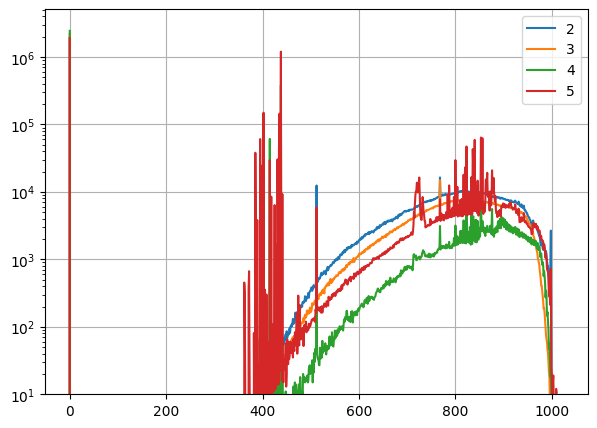

In [158]:
plt.figure(figsize=(7, 5))
for k in ["2", "3", "4", "5"]:
    plt.semilogy(dnoise[k][0, 0, :, 0], label=k)
plt.legend()
plt.grid()
plt.ylim(1e1)
plt.show()

#### Load

First acc cnt: 680 (16:22)

Last acc cnt: 900 (16:26)

In [159]:
# load data
hload, dload = io.read_file(files[12])
print(hload["acc_cnt"])
datetime.fromtimestamp(hload["sync_time"]).isoformat()

[723 724 725 726 727 728 729 730 731 732 733 734 735 736 737 738 739 740
 741 742 743 744 745 746 747 748 749 750 751 752 753 754 755 756 757 758
 759 760 761 762 763 764 765 766 767 768 769 770 771 772 773 774 775 776
 777 778 779 780 781 782]


'2023-10-11T16:10:09.253352'

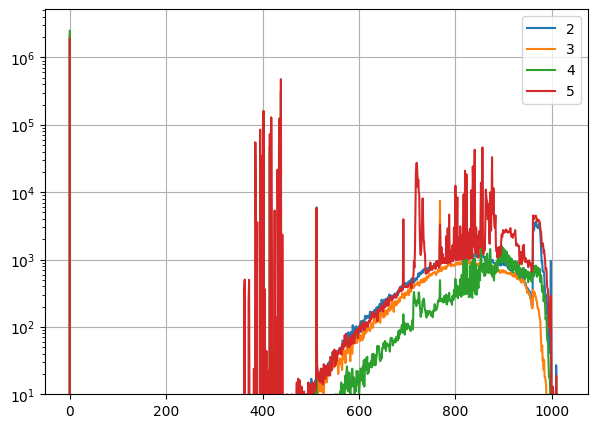

In [160]:
plt.figure(figsize=(7, 5))
for k in ["2", "3", "4", "5"]:
    plt.semilogy(dload[k][0, 0, :, 0], label=k)
plt.legend()
plt.grid()
plt.ylim(1e1)
plt.show()

## Diff

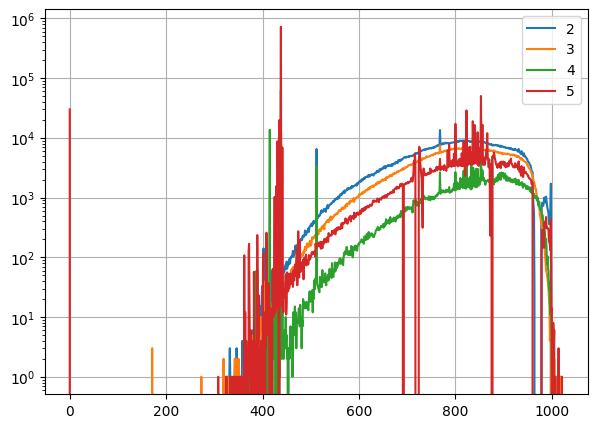

In [163]:
plt.figure(figsize=(7, 5))
for k in ["2", "3", "4", "5"]:
    plt.plot(dnoise[k][0, 0, :, 0]-dload[k][0, 0, :, 0], label=k)
plt.legend()
plt.grid()
plt.yscale("log")
#plt.ylim(1e1)
plt.show()